# Business Intelligence (WI-201) / 2023
#### Prof. Dr. Sebastian Fischer


## Übungsblatt 2: Machine Learning

> *Durch die Bearbeitung dieses Übungsblattes werden die Lerninhalte der Lerneinheit 2 praktisch angewendet und gefestigt. Durch pünktliche Abgabe eines vollständigen Übungsblattes werden Punkte auf die Gesamtbewertung erzielt. Das Übungsblatt ist eine Individualleistung. Gleichzeitig darf mit maximal zwei weiteren Studierenden gemeinsam die eigene Lösung besprochen werden. Sollte eine Lösung Elemente von anderen Studierenden oder Quellen beinhalten, die nicht als solche gekennzeichnet wurden, wird das Übungsblatt für alle Beteiligten mit 0 Punkten bewertet.*

## Einführung (Business Understanding)

Eure Eltern sind Immobilienmakler:innen in Melbourne (Australien) und haben davon gehört, dass ihr Experten der Datenalyse seid. Bisher haben sie Verkaufspreise ihrer Immobilien immer aus dem Bauch heraus auf Basis der Immobilienmerkmale wie Quadratmeter oder Raumanzahl ermittelt. Seit kurzem gehen die Verkäufe zurück, weil konkurierende Immobilienmakler:innen besser in der Lage sind den richtigen Preispunkt für ihre Kunden zu finden. Eure Eltern hoffen, dass ihnen eine "intelligente" Software dabei helfen kann den besten Preispunkt für ihre zukünftigen Immobilien zu finden. Das folgende Übungsblatt soll ein derartigen Preis-Schätzer für Immobilien bauen. 

Nach kurzem Gespräch mit euren Eltern findet ihr heraus, dass sie eine Liste aller in der Vergangenheit verkauften Immobilien (von sich und von ihrer Konkurrenz), deren Eigenschaften und Verkaufspreise haben. Wir werden nun mit Methoden des machinellen Lernens ein Modell bauen, welches Immobilienpreise von zukünftigen Häusern schätzt. Das Modell wird "trainniert" auf Basis der vergangenen erfolgreich verkauften Immobilien. 

Wir beginnen mit einem Modell namens Entscheidungsbaum (Decision Tree). Es gibt sehr viele unterschiedliche Modelle, die noch genauere Vorhersagen liefern könnten. Aber Entscheidungsbäume sind einfach zu verstehen und sie sind der Grundbaustein für einige der besten Modelle in der Datenwissenschaft.

Der Einfachheit halber beginnen wir mit dem einfachsten möglichen Entscheidungsbaum:


<div>
<img src="img/Entscheidungsbaum_1.png" width="30%"/>
</div>

Dieser einfache Entscheidungsbaum teilt Häuser in nur zwei Kategorien ein. Der prognostizierte Preis für jedes in Frage kommende Haus ist der historische Durchschnittspreis von Häusern derselben Kategorie.

Wir verwenden Daten, um zu entscheiden, wie die Häuser in zwei Gruppen aufgeteilt werden, und dann erneut, um den prognostizierten Preis in jeder Gruppe zu bestimmen. Dieser Schritt des Erfassens von Mustern aus Daten wird als Anpassen oder **Trainieren** des Modells bezeichnet. Die zum Anpassen des Modells verwendeten Daten werden als **Trainingsdaten** bezeichnet.

---
### Verbesserung des Entscheidungsbaums
Was meint ihr, welcher der beiden folgenden Entscheidungsbäume ist besser?

<div>
<img src="img/Entscheidungsbaum_2.png" width="60%"/>
</div>

Der Entscheidungsbaum auf der linken Seite (Entscheidungsbaum 1) ist wahrscheinlich sinnvoller, da er die Realität widerspiegelt, dass Häuser mit mehr Schlafzimmern tendenziell zu höheren Preisen verkauft werden als Häuser mit weniger Schlafzimmern. Der größte Nachteil dieses Modells besteht darin, dass es die meisten Faktoren, die den Hauspreis beeinflussen, wie Anzahl der Badezimmer, Grundstücksgröße, Lage usw., nicht erfasst.

Wir können mehr Faktoren erfassen, indem wir einen Baum mit mehr "Splits" verwenden. Diese werden "tiefere" Bäume genannt. Ein Entscheidungsbaum, der auch die Wohnfläche jedes Hauses berücksichtigt, könnte folgendermaßen aussehen:
<div>
<img src="img/Entscheidungsbaum_3.png" width="60%"/>
</div>

Diese Bäume sagen den Preis eines Hauses voraus, indem Sie den Baumknoten durchgehen und immer den Pfad auswählen, der den Eigenschaften dieses Hauses entspricht. Der prognostizierte Preis für das Haus steht am Ende des Baums. Der untere Punkt, an dem wir eine Vorhersage treffen, wird als **Blatt** bezeichnet.

Die Teilungen und Werte an den Blättern werden durch die Daten bestimmt, also ist es an der Zeit, dass Sie sich die Daten ansehen, mit denen Sie arbeiten werden.

## Wir verwenden die Python-Bibliothek Pandas, um uns mit den Daten vertraut zu machen (Data Understanding)

Der erste Schritt in jedem maschinellen Lernprojekt besteht darin, sich mit den Daten vertraut zu machen. Wir verwenden dafür die Pandas-Bibliothek. Pandas ist das primäre Tool, das Datenwissenschaftler zum Erkunden und Bearbeiten von Daten verwenden. Die meisten Leute kürzen Pandas in ihrem Code mit pd ab. Das machen wir hiermit auch.

In [1]:
import pandas as pd

Der wichtigste Teil der Pandas-Bibliothek ist der DataFrame. Ein DataFrame enthält den Datentyp, den wir uns als Tabelle vorstellen können. Dies ähnelt einem Tabellenblatt in Excel oder einer Tabelle in einer SQL-Datenbank.

Pandas verfügt über leistungsstarke Methoden für die meisten Dinge, die wir mit dieser Art von Daten tun möchten.

Als Beispiel sehen wir uns die Daten der Immobilienmakler-Eltern zu den Immobilienpreisen in Melbourne, Australien, an. 

Wir laden und untersuchen die Daten mit den folgenden Befehlen:

In [2]:
data_path = 'data/melb_data.csv'
# Daten einlesen und in ein DataFrame packen
melbourne_data = pd.read_csv(data_path, index_col=0) 
# Statistische Zusammenfassung der Daten
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Datenbeschreibung interpretieren

Die Ergebnisse zeigen 8 Zahlen für jede Spalte in unserem ursprünglichen Datensatz. Die erste Zahl, **Count** (Anzahl), zeigt an, wie viele Zeilen nicht fehlende Werte enthalten. Fehlende Werte treten aus vielen Gründen auf. Beispielsweise würde die Größe des 2. Schlafzimmers bei der Vermessung eines Hauses mit nur einem Schlafzimmer nicht erfasst. Wir kommen auf das Thema fehlender Daten zurück.

Der zweite Wert ist der Mittelwert (**mean**), also der Durchschnitt. Darunter ist **std** die Standardabweichung, die misst, wie stark die Werte um den Durchschnitt verteilt sind.

Um die **Min-, 25-%-, 50-%-, 75-%- und Max-Werte** zu interpretieren, stellen wir uns vor, jede Spalte vom niedrigsten zum höchsten Wert zu sortieren. Der erste (kleinste) Wert ist der min. Wenn wir die Liste bis zum ersten Viertel durchgehen, finden wir eine Zahl, die größer als 25 % der Werte und kleiner als 75 % der Werte ist. Das ist der 25%-Wert (ausgesprochen „25. Perzentil“). Das 50. und 75. Perzentil werden analog definiert, wobei das Maximum die größte Zahl ist.

## Auswählen von Daten für die Modellierung (Data Preparation)
Der Datensatz hat zu viele Variablen, um sich darüber Gedanken zu machen oder ihn sogar gut auszudrucken. Wie können wir diese überwältigende Datenmenge auf etwas reduzieren, das wir sie verstehen können? 

Wir beginnen mit der Auswahl einiger Variablen, von denen wir intuitiv ausgehen, dass sie einen relevanten Einfluss auf den Verkaufspreis der Immobilien haben. Um Variablen/Spalten auszuwählen, müssen wir eine Liste aller Spalten im Datensatz sehen. Dies geschieht mit der **columns**-Eigenschaft des DataFrame:

In [3]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
# Die Melbourne-Daten haben einige fehlende Werte (einige Häuser, für die einige Variablen nicht aufgezeichnet wurden.)
# Zum Umgang mit fehlenden Werten könnte man eine eigene Lerneinheit füllen. 
# Es reicht vorerst, wenn wir Häuser mit fehlenden Werten aus unseren Daten entfernen

# dropna löscht fehlende Werte (wir können uns na als "nicht verfügbar" / "not available" vorstellen)
melbourne_data = melbourne_data.dropna(axis=0)

### Auswählen des Vorhersageziels

Wir können eine Variable mit Punktnotation herausziehen. Diese einzelne Spalte wird in einer Serie (**series**, spezieller Datentyp in Pandas) gespeichert, die im Großen und Ganzen einem DataFrame mit nur einer einzigen Datenspalte ähnelt.

Wir verwenden die Punktnotation, um die Spalte auszuwählen, die wir vorhersagen möchten (wird als Vorhersageziel bezeichnet). Per Konvention wird das Vorhersageziel y genannt. Der Code, den wir zum Speichern der Hauspreise in den Melbourne-Daten benötigen, lautet also:

In [5]:
y = melbourne_data.Price

### Auswahl von "Features"

Die Spalten, die in unser Modell eingehen (und später verwendet werden, um Vorhersagen zu treffen) werden als "Features" bezeichnet. In unserem Fall wären dies die Spalten, die zur Bestimmung des Immobilienpreises verwendet werden. Manchmal verwenden wir alle Spalten außer der Zielvariable (hier der Preis) als Features. In anderen Fällen können wir mit weniger Features zu besseren Ergebnissen kommen. Die Auswahl der richtigen Features und das gezielte Generieren neuer Features wird als **Feature Engineering** bezeichnet. Auch dieses Thema könnte in einer eigenen Lerneinheit vertieft werden - sprengt hier allerdings unseren Rahmen.

Wir wählen mehrere Features aus, indem wir eine Liste von Spaltennamen in Klammern bereitstellen. Jedes Element in dieser Liste sollte eine Zeichenfolge (mit Anführungszeichen) sein.

Hier ist ein Beispiel:

In [6]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [7]:
#Nach Konvention werden diese Daten als X bezeichnet
X = melbourne_data[melbourne_features]

Sehen wir uns kurz die Daten an (mit der Methode "describe" und der Methode "head")

In [8]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [9]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
2,2,1.0,156.0,-37.8079,144.9934
4,3,2.0,134.0,-37.8093,144.9944
6,4,1.0,120.0,-37.8072,144.9941
11,3,2.0,245.0,-37.8024,144.9993
14,2,1.0,256.0,-37.8060,144.9954


### Explorative Datenanalyse (EDA)

Die visuelle Überprüfung unserer Daten mit diesen Befehlen ist ein wichtiger Teil der Arbeit eines Datenwissenschaftlers. Zusätzlich sollten wir mit Hilfe der Datenvisualisierung uns ein besseres Bild der Daten machen. Wir werden häufig Überraschungen im Datensatz finden, die eine weitere Untersuchung verdienen.

In [10]:
# Für die Visualisierung nutzen wir die beiden sehr beliebten Bibliothekn matplotlib und seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

X_and_y = X.drop(columns=["Longtitude", "Lattitude"])
X_and_y["Price"] = y

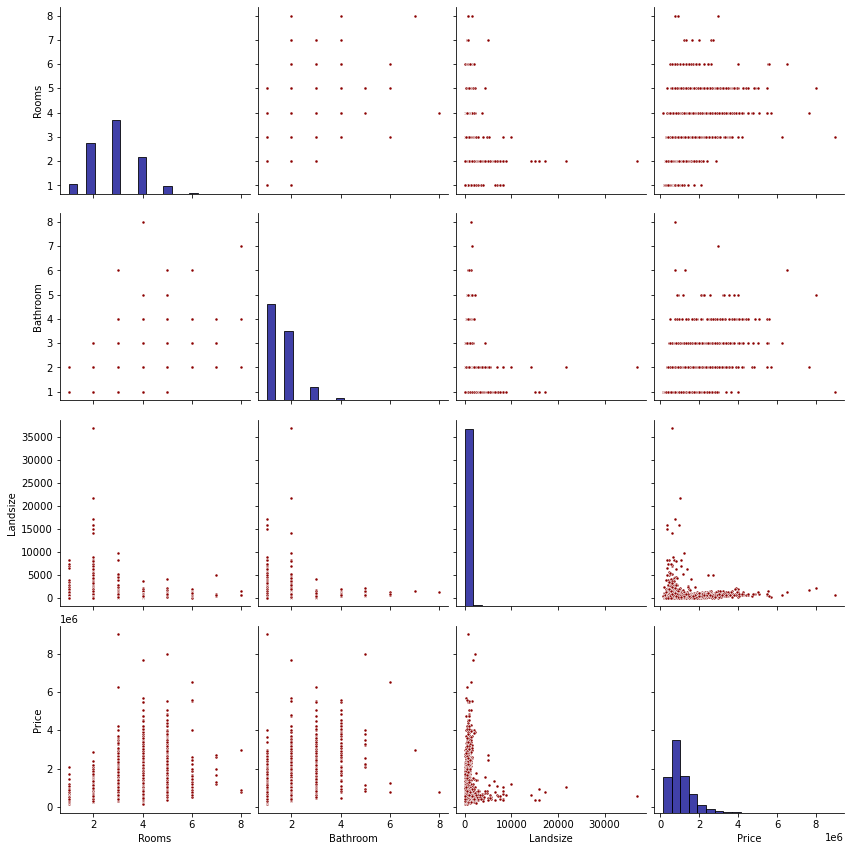

In [11]:
# Hier sehen wir, wie sich die einzelnen Variablen zueinander verhalten
sns.pairplot(data=X_and_y, kind='scatter', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'.','color':'darkred'}, size=3);

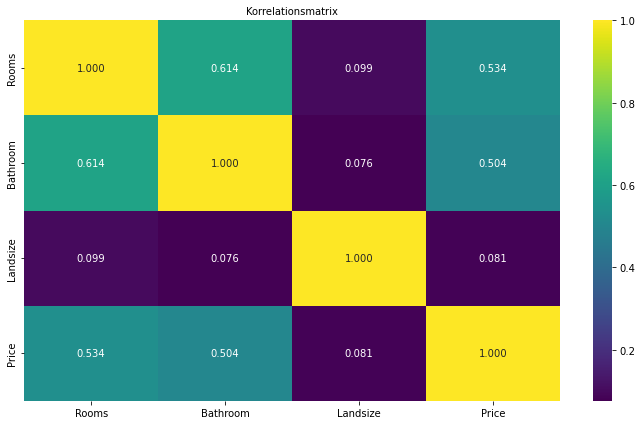

In [12]:
# Anschließend erstellen wir eine Korrelationsmatrix 
fig, ax= plt.subplots(figsize=(12,7))
sns.heatmap(X_and_y.corr(), annot=True, cmap='viridis',
            fmt='0.3f',ax=ax)
ax.set_title('Korrelationsmatrix', fontsize=10);


Hier sehen wir, wie die einzelnen Features inklusive der Zielvariable paarweise mit einander in Beziehung stehen (Korrelation). Die Zahl in der jeweiligen Zelle gibt den Grad der Korrelation an. Wenn sie nah bei 1 liegt handelt es sich um eine starke, wenn sie nah bei 0 ist um eine schwache, positive Korrelation (wenn ein die eine Variable zunimmt, nimmt die andere um das 0,xx fache auch zu). Negative Werte würden einen gegenläufigen Zusammenhang darstellen (wenn ein Wert zunimmt, nimmt der andere ab).

Es lässt sich feststellen, dass die Anzahl der Räume und die Anzahl der Bäder jeweils mit dem Preis korrelieren und der Korrelationskoeffizient bei 0,534 (Preis/Raumanzahl) und 0,504 (Preis/Bäderanzahl) liegt. Das sind beides keine starken Zusammenhänge.

---
# Aufbau des Modells (Modeling)

Wir verwenden die Bibliothek **scikit-learn**, um unsere Modelle zu erstellen. Beim Programmieren wird diese Bibliothek als **sklearn** geschrieben, wie wir im folgenden Code sehen werden. Scikit-learn ist mit Abstand die beliebteste Bibliothek zum Modellieren der Datentypen, die typischerweise in DataFrames gespeichert werden.

Die Schritte zum Erstellen und Verwenden eines Modells sind:
* **Definieren:** Welche Daten haben wir und welche Arten von Modellen eignen sich? Welche Parameter des Modells müssen wir optimieren? 
* **Lernen/Anpassen:** Automatische Anpassung der Modellparameter. Dies ist das Herzstück des Modellierens.
* **Prognose:** So wie es sich anhört, also in unserem Fall Häuserpreise schätzen.
* **Bewerten**: Bestimmen, wie gut/genau die Vorhersagen unseres Modells sind.

Hier ist ein Beispiel für die Definition eines Entscheidungsbaummodells mit scikit-learn:

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Modell definieren. Wir geben eine Zahl für random_state an, um bei jeder Ausführung dieselben Ergebnisse sicherzustellen
melbourne_model = DecisionTreeRegressor(random_state=1)

# Lernen (Model fitting)
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Viele maschinelle Lernmodelle ermöglichen eine gewisse Zufälligkeit beim Modelltraining. Die Angabe einer Zahl für random_state stellt sicher, dass wir bei jedem Durchlauf dieselben Ergebnisse erhalten. Dies wird als gute Praxis angesehen. Wir verwenden eine beliebige Zahl, und die Modellqualität hängt nicht wesentlich davon ab, welchen Wert wir genau wählen.

Wir haben jetzt ein trainiertes Modell, das wir verwenden können, um Vorhersagen zu treffen.

In der Praxis möchten wir ja Vorhersagen für neue Häuser treffen, die auf den Markt kommen, also für Häuser, für die wir noch keine Preise haben. Hier machen wir nun Vorhersagen für die ersten Zeilen der Trainingsdaten, um zu sehen, wie die Vorhersagefunktion funktioniert.

In [14]:
print("Vorhersagen für die folgenden 5 Häuser treffen:")
print(X.head())
print("Die Vorhersagen sind:")
print(melbourne_model.predict(X.head()))

Vorhersagen für die folgenden 5 Häuser treffen:
    Rooms  Bathroom  Landsize  Lattitude  Longtitude
2       2       1.0     156.0   -37.8079    144.9934
4       3       2.0     134.0   -37.8093    144.9944
6       4       1.0     120.0   -37.8072    144.9941
11      3       2.0     245.0   -37.8024    144.9993
14      2       1.0     256.0   -37.8060    144.9954
Die Vorhersagen sind:
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Modellvalidierung (Evaluation)
Wir haben nun ein Modell gebaut. Aber wie gut ist es? Nun lernen wir, wie wir die Modellvalidierung verwenden, um die Qualität unseres Modells zu messen. Die Messung der Modellqualität ist der Schlüssel zur iterativen Verbesserung unserer Modelle.

Wir sollten als Datenwissenschaftler jedes Modell, das wir jemals bauen werden, evaluieren. In den meisten (jedoch nicht allen) Anwendungen ist das relevante Maß für die Modellqualität die Vorhersagegenauigkeit. Mit anderen Worten, sollten die Vorhersagen des Modells nahe an dem liegen, was tatsächlich passiert / passieren wird.

Viele (noch unerfahrende) Datenwissenschaftler machen einen großen Fehler bei der Messung der Vorhersagegenauigkeit. Sie treffen Vorhersagen mit ihren *Trainingsdaten* und vergleichen diese Vorhersagen mit den Zielwerten in den *Trainingsdaten*. Wir werden gleich das Problem mit diesem Ansatz und dessen Lösung sehen, aber lassen wir uns zuerst darüber nachdenken, wie wir dies tun würden.

Wir müssten zunächst die Modellqualität auf verständliche Weise zusammenfassen. Wenn wir die prognostizierten und tatsächlichen Hauswerte für 10.000 Häuser vergleichen, werden wir wahrscheinlich eine Mischung aus guten und schlechten Vorhersagen finden. Eine Liste mit 10.000 prognostizierten und tatsächlichen Werten durchzusehen, wäre sinnlos. Wir müssen dies in einer einzigen Metrik zusammenfassen.

Es gibt viele Metriken zur Zusammenfassung der Modellqualität, aber wir beginnen mit einer namens **Mean Absolute Error** (auch **MAE** genannt). Lassen wir uns diese Metrik aufschlüsseln, beginnend mit dem letzten Wort, "Error" (Fehler).

Der Vorhersagefehler für jedes Haus ist: <br>
```
Vorhersagefehler = tatsächlicher Wert - vorhergesagter Wert
```
 
Wenn also ein Haus 150.000 € kostet und wir vorausgesagt haben, dass es 100.000 € kosten würde, beträgt der Fehler 50.000 €.

Bei der MAE-Metrik nehmen wir den absoluten Wert jedes Fehlers. Dadurch wird jeder Fehler in eine positive Zahl umgewandelt. Wir nehmen dann den Durchschnitt dieser absoluten Fehler. Daran messen wir die Modellqualität. Im Klartext kann man sagen:

> Im Durchschnitt weichen unsere Vorhersagen um etwa X ab. (X ist dabei eine absolute Zahl und keine Prozentzahl)

Um MAE zu berechnen, können wir auf die entsprechende Funktion in der sklearn Bibliothek zurückgreifen.

In [15]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

### Das Problem mit „In-Sample“-Scores

Das Maß, das wir gerade berechnet haben, kann als "In-Sample"-Score bezeichnet werden. Wir haben eine einzelne „Stichprobe“ von Häusern sowohl für den Bau des Modells als auch für dessen Bewertung verwendet. Das ist nicht gut, weil:

Stellen wir uns vor, dass auf dem großen Immobilienmarkt die Türfarbe nichts mit dem Hauspreis zu tun hat.

In der Datenstichprobe, die wir zum Erstellen des Modells verwendet haben, waren jedoch alle Häuser mit grünen Türen sehr teuer. Die Aufgabe des Modells ist es, Muster zu finden, die Hauspreise vorhersagen, also wird es dieses Muster erkennen und immer hohe Preise für Häuser mit grünen Türen vorhersagen.

Da dieses Muster aus den Trainingsdaten abgeleitet wurde, erscheint das Modell in den Trainingsdaten genau.

Wenn dieses Muster jedoch nicht gilt, wenn das Modell neue Daten sieht, wäre das Modell in der Praxis sehr ungenau.

Da sich der praktische Wert von Modellen aus Vorhersagen auf neuen Daten ergibt, messen wir die Leistung anhand von Daten, die nicht zum Erstellen des Modells verwendet wurden. Der einfachste Weg, dies zu tun, besteht darin, einige Daten aus dem Modellerstellungsprozess auszuschließen und diese dann zu verwenden, um die Genauigkeit des Modells anhand von Daten zu testen, die es zuvor nicht gesehen hat. Diese Daten werden **Testdaten** (test set) genannt.

Die scikit-learn-Bibliothek hat eine Funktion „train_test_split“, um die Daten in zwei Teile aufzuteilen. Wir verwenden einige dieser Daten als Trainingsdaten, um das Modell anzupassen, und wir verwenden die anderen Daten als Testdaten, um "mean_absolute_error" zu berechnen.

Hier ist der Code:

In [16]:
from sklearn.model_selection import train_test_split

# Daten in Trainings- und Testsdaten aufteilen, sowohl für Features als auch für die Zielvariable "Preis"
# Die Aufteilung basiert auf einem Zufallszahlengenerator. Die Übergabe eines numerischen Werts an
# das Argument random_state garantiert, dass wir jedes Mal die gleiche Aufteilung erhalten
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)
# Modelldefinition
melbourne_model = DecisionTreeRegressor()
# Modelltraining
melbourne_model.fit(train_X, train_y)

# Prognose auf nicht zum Training verwendete Testdaten
predictions = melbourne_model.predict(test_X)
# MAE Berechnung auf Basis der prognostizierten Daten und der Realität (die Preise aus dem Testdatensatz)
print(mean_absolute_error(test_y, predictions))

267917.9259737465


Interessant! Der mittlere absolute Fehler (Mean Absolute Error, MAE) für die In-Sample-Daten betrug etwa 1000 Euro. Out-of-Sample sind es mehr als 270.000 Euro.

Dies ist der Unterschied zwischen einem Modell, das fast genau richtig ist, und einem Modell, das für die meisten praktischen Zwecke unbrauchbar ist. Als Referenzwert sei zu erwähnen, dass der durchschnittliche Hauswert in den Testdaten 1,1 Millionen Euro beträgt. Der Vorhersagefehler auf Basis neuer Daten beträgt also etwa ein Viertel des durchschnittlichen Hauswerts.

# Experimentieren mit verschiedenen Modellen

Wir wollen nun ein Modell finden, welches bessere Vorhersagen für neue Häuser trifft, als unser bisheriges Modell. Wir wollen also mit jedem weiteren Modell den MAE ein Stück reduzieren. Dazu müssen wir im ersten Schritt die Konzepte Underfitting und Overfitting verstehen und in der Lage sein, diese Ideen anzuwenden, um unser Modell zu optimieren.

Wir können in der [Dokumentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) von scikit-learn sehen, dass das Entscheidungsbaummodell viele Optionen hat. Eine dieser Optionen (in diesem Kontext auch "Hyperparameter" genannt) bestimmen zum Beispiel die Baumtiefe. Erinnern wir uns an das Bild von oben, wo dargestellt wurde, dass die Tiefe eines Baums ein Maß dafür ist, wie viele Entscheidungen/Abzweigungen er macht, bevor er zu einer Vorhersage kommt. Oben wurde ein relativ flacher Baum dargestellt. 

In der Praxis ist es nicht ungewöhnlich, dass ein Baum 10 Abzweigungen zwischen der obersten Ebene (alle Häuser) und einem Blatt hat. Wenn der Baum tiefer wird, wird der Datensatz in Blätter mit weniger Häusern aufgeteilt. Wenn ein Baum nur eine Teilung hatte, teilt er die Daten in 2 Gruppen. Wenn jede Gruppe wieder aufgeteilt wird, würden wir 4 Häusergruppen erhalten. Wenn wir diese erneut aufteilen, werden 8 Gruppen erstellt. Wenn wir die Anzahl der Gruppen verdoppeln, indem wir auf jeder Ebene weitere Unterteilungen hinzufügen, haben wir \\(2^{10}\\) Gruppen von Häusern, wenn wir die 10. Ebene erreichen. Das sind 1024 Blätter.

Wenn wir die Häuser auf viele Blätter aufteilen, haben wir auch weniger Häuser die zu jedem Blatt passen. Blätter mit sehr wenigen Häusern treffen Vorhersagen, die ziemlich nahe an den tatsächlichen Werten dieser Häuser liegen, aber sie können sehr unzuverlässige Vorhersagen für neue Daten machen (da jede Vorhersage nur auf einigen wenigen Häusern basiert).

Dies ist ein Phänomen namens **Overfitting**, bei dem ein Modell fast perfekt mit den Trainingsdaten übereinstimmt, aber bei der Validierung mit anderen neuen Daten schlecht abschneidet. Auf der anderen Seite, wenn wir unseren Baum sehr flach machen, teilt er die Häuser nicht in sehr unterschiedliche Gruppen.

Im Extremfall, wenn ein Baum Häuser in nur 2 oder 4 Kategorien teilt, hat jede Gruppe immer noch eine große Vielfalt an Häusern. Die resultierenden Vorhersagen können für die meisten Häuser weit entfernt sein, sogar in den Trainingsdaten (und es wird aus dem gleichen Grund auch bei der Validierung schlecht sein). Wenn ein Modell wichtige Unterschiede und Muster in den Daten nicht erfassen kann und daher selbst in Trainingsdaten schlecht abschneidet, spricht man von **Underfitting**.

Da uns die Genauigkeit neuer Daten wichtig ist, die wir anhand unserer Testdaten schätzen, möchten wir den optimalen Punkt zwischen Underfitting und Overfitting finden. Optisch wollen wir den Tiefpunkt der (roten) Validierungskurve finden:

<div>
<img src="img/OverUnderfitting.png" width="50%"/>
</div>

### Beispiel
Es gibt einige Optionen (Hyperparameter) zum Steuern der Baumtiefe, und viele ermöglichen es, dass einige Pfade durch den Baum eine größere Tiefe haben als andere Routen (der Baum also nicht ausbalanciert sein muss). Das Argument *max_leaf_nodes* bietet eine gute Möglichkeit, Overfitting vs. Underfitting zu kontrollieren. Je mehr Blätter wir dem Modell erlauben zu machen, desto mehr bewegen wir uns vom Underfitting-Bereich in der obigen Grafik zum Overfitting-Bereich.

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

Wir können eine for-Schleife verwenden, um die Genauigkeit von Modellen zu vergleichen, die mit unterschiedlichen Werten für max_leaf_nodes erstellt wurden.

In [18]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


Von den aufgeführten Optionen ist 500 die optimale Anzahl von Blättern.

Entscheidungsbäume stellen uns vor eine schwierige Entscheidung. Ein tiefer Baum mit vielen Blättern leidet unter overfitting (Überanpassung), da jede Vorhersage auf historischen Daten von nur den wenigen Häusern an einem Blatt basiert. Aber ein flacher Baum mit wenigen Blättern wird schlecht abschneiden, weil er nicht so viele Unterschiede in den Rohdaten erfassen kann (underfitting).

Sogar die anspruchsvollsten Modellierungstechniken von heute sind mit dieser Spannung zwischen Underfitting und Overfitting konfrontiert. Viele Modelle haben jedoch clevere Ideen, die zu einer besseren Leistung führen können. Als Beispiel betrachten wir nun den **Random Forest**.

Der Random Forest verwendet viele Bäume und macht eine Vorhersage, indem er die Vorhersagen jedes einzelnen Baums mittelt (den Durchschnitt bildet). Der Random Forest hat im Allgemeinen eine viel bessere Vorhersagegenauigkeit als ein einzelner Entscheidungsbaum und funktioniert gut mit Standardparametern. Wenn wir weiter modellieren, können wir mehr Modelle mit noch besserer Leistung lernen, aber viele davon sind empfindlich, wenn es darum geht, die richtigen Parameter zu erhalten.

Wir erstellen ein Random Forest Modell ähnlich wie wir einen Entscheidungsbaum in scikit-learn erstellt haben – diesmal unter Verwendung der Klasse „RandomForestRegressor“ anstelle von „DecisionTreeRegressor“.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(test_X)
print(mean_absolute_error(test_y, melb_preds))

207190.6873773146


Es gibt immer noch viel Raum für weitere Verbesserungen, aber dies ist eine große Verbesserung gegenüber dem besten Entscheidungsbaumfehler von 260.000. Es gibt Parameter, mit denen wir die Beschaffenheit des Random Forest ändern können, so wie wir die maximale Tiefe des einzelnen Entscheidungsbaums auch geändert haben. Aber eine der besten Eigenschaften von Random-Forest-Modellen ist, dass sie im Allgemeinen auch ohne diese Optimierung der Hyperparameter vernünftig funktionieren.

### Geht es noch besser?
Abschließend schauen wir uns ein noch komplexeres Machine Learning Modell an. Den sogenannten GradientBoostingRegressor. Dieser verfolgt im Kern ebenfalls die Idee eines Random Forests, allerdings wurden weitere Techniken angewendet, die zu einer höheren Vorhersagegüte führen (können). Ergänzt wurde dieses Modell um eine automatisierte Suche nach optimalen Hyperparametern. Dieses Vorgehen wird als "Grid Search" bezeichnet. Details dazu sprengen den Rahmen dieses Übungsblattes, können aber gerne im Zusammenhang mit "Hyperparameteroptimierung" und "Cross Validation" eigenständig recherchiert werden.

Das Ausführen des Trainingsprozesses kann einige Minuten in Anspruch nehmen und wird den Rechner sehr beschäftigen. Holt euch einen Kaffee und atmet erst mal tief durch. Ich schätze 5-10 Minuten maximal.

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor(random_state=1, loss='absolute_error')
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000,1500],
                  'max_depth'    : [4,6,8,10]
                 }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(train_X, train_y)

In [22]:
print("Hyperparameter (Optionen des GradientBoostingRegressors), die zum besten Ergebnis geführt haben:" )
print("\n ",grid_GBR.best_estimator_)
melb_preds = grid_GBR.predict(test_X)
print("\n MAE vom GradientBoostingRegressor:\n",mean_absolute_error(test_y, melb_preds))

Hyperparameter (Optionen des GradientBoostingRegressors), die zum besten Ergebnis geführt haben

  GradientBoostingRegressor(learning_rate=0.02, loss='absolute_error',
                          max_depth=10, n_estimators=1500, random_state=1,
                          subsample=0.2)

 MAE vom GradientBoostingRegressor:
 201046.7965444618


# Nun seid ihr an der Reihe!
Ihr habt nun "für eure Eltern" eine intelligente Software geschrieben, die für Immobilien Preise schätzen kann. Nun hat eure Tante davon Wind bekommen und möchte, dass ihr das Gleiche für ihr Autohaus baut. Sie hat einen Datensatz, der viele Autos und deren Verkaufspreise enthält. Sie möchte, mit Hilfe eures Tools in der Lage sein, einen idealen Verkaufspreis für zukünftige Autos zu ermitteln.

Im Order "data" befindet sich der Datensatz eurer Tante. Nehmt diesen als Basis um analog zu dem Tutorial oben mehr über die Daten zu erfahren und ein Vorhersagemodell für Autopreise zu trainieren.

### Aufgabe 1

In [21]:
# Laded die Datei "car_sales.csv" in ein DataFrame
data_path = 'data/car_sales.csv'
car_data = pd.read_csv(data_path, index_col=0).drop(columns=["index"])
car_data = car_data.dropna(axis=0)

# Statistische Zusammenfassung der Daten
# INSERT CODE HERE

,year,price,mileage,tax,mpg,engineSize
count,80695.00,80695.00,80695.00,80695.00,80695.00,80695.00
mean,2017.11,18130.56,23079.25,118.82,55.86,1.72
std,2.14,10280.40,21506.88,64.77,17.05,0.59
min,1970.00,495.00,1.00,0.00,0.30,0.00
25%,2016.00,10991.00,7000.00,125.00,47.70,1.20
50%,2017.00,15995.00,17210.00,145.00,55.40,1.60
75%,2019.00,22495.00,32486.00,145.00,64.20,2.00
max,2060.00,159999.00,323000.00,580.00,470.80,6.60


In [22]:
# Lasst euch die ersten 5 Zeilen des DataFrames car_data anzeigen
# INSERT CODE HERE

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [23]:
# Erstellt X (dataframe mit den Features) und y (Series für die Zielvariable)
# INSERT CODE HERE

### Aufgabe 2

In [ ]:
# Erstellt mindestens eine Visualisierung der Daten
# INSERT CODE HERE

In [24]:
# Unser Datensatz besteht nicht nur aus numerischen Variablen sondern auch aus kategorischen.
# Kategorische Variablen lassen sich nicht "einfach so" als Einflussvariablen für den Entscheidungsbaum nutzen.
# Wir müssen die kategorischen Variablen daher zu Dummy Variablen umwandeln
X = pd.get_dummies(X, columns=['model','transmission','fuelType', 'brand'], drop_first=True)

In [25]:
X.head()

,year,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,brand_bmw,brand_ford,brand_merc,brand_skoda,brand_toyota,brand_vw
0,2017,15735,150.0,55.4,1.4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2016,36203,20.0,64.2,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,29946,30.0,55.4,1.4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2017,25952,145.0,67.3,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,1998,145.0,49.6,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Aufgabe 3

In [26]:
# Daten in Trainings- und Testsdaten aufteilen, sowohl für Features als auch für die Zielvariable "Preis"
# INSERT CODE HERE


# Modelldefinition
# INSERT CODE HERE


# Modelltraining ("Fit")
# INSERT CODE HERE


# Prognose auf nicht zum Training verwendete Testdaten
# INSERT CODE HERE


# MAE Berechnung auf Basis der prognostizierten Daten und der Realität (die Preise aus dem Testdatensatz)
# INSERT CODE HERE



# Mit einer For-Schleife den optimalen Wert für den Hyperparameter max_leaf_nodes finden.
# INSERT CODE HERE


1549.984203873525
Max leaf nodes: 5  		 Mean Absolute Error:  4325
Max leaf nodes: 50  		 Mean Absolute Error:  2842
Max leaf nodes: 500  		 Mean Absolute Error:  1788
Max leaf nodes: 5000  		 Mean Absolute Error:  1414
Max leaf nodes: 7500  		 Mean Absolute Error:  1424
Max leaf nodes: 10000  		 Mean Absolute Error:  1441
Max leaf nodes: 20000  		 Mean Absolute Error:  1498
Max leaf nodes: 50000  		 Mean Absolute Error:  1548


### Aufgabe 4

In [27]:
# Einen Random Forest trainieren.
# INSERT CODE HERE



1215.0790104863731


In [ ]:
# Mindestens ein weiteres Modell eurer Wahl aus der sklearn Bibliothek anwenden und MAE ausgeben. 
# Wer den besten MAE schafft, bekommt ein Bienchen ins Muttiheft.


In [ ]:
# INSERT CODE HERE

### Aufgabe 5
> Bitte fast kurz zusammen, was ihr über den car_data Datensatz herausgefunden habt und wie gut eure Modelle sind.

In [2]:
# INSERT "ZUSAMMENFASSUNG" HERE

*Vorlage für dieses Übungsblatt: https://www.kaggle.com/learn/intro-to-machine-learning*